In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
menu = pd.read_csv("Restaurant_Orders/menu_items.csv")
print(menu.head())

order_details = pd.read_csv("Restaurant_Orders/order_details.csv")
print(order_details.head())

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
   order_details_id  order_id order_date   order_time  item_id
0                 1         1     1/1/23  11:38:36 AM    109.0
1                 2         2     1/1/23  11:57:40 AM    108.0
2                 3         2     1/1/23  11:57:40 AM    124.0
3                 4         2     1/1/23  11:57:40 AM    117.0
4                 5         2     1/1/23  11:57:40 AM    129.0


In [18]:
print(menu.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB
None


In [19]:
print(menu.isnull().sum())
print(order_details.isnull().sum())

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64
order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64


In [20]:
menu["item_id"] = menu["menu_item_id"]
menu.head()

,menu_item_id,item_name,category,price,item_id
0,101,Hamburger,American,12.95,101
1,102,Cheeseburger,American,13.95,102
2,103,Hot Dog,American,9.00,103
3,104,Veggie Burger,American,10.50,104
4,105,Mac & Cheese,American,7.00,105


In [21]:
merged_df = pd.merge(order_details, menu, on="item_id", how="left")
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,129.0,Mushroom Ravioli,Italian,15.50


In [22]:
empty_orders = merged_df[merged_df["item_id"].isnull()]
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
menu_item_id        0
item_name           0
category            0
price               0
dtype: int64

In [23]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format = 'mixed')
print(f' date data type: ',{type(merged_df["order_date"][1])})
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], format = 'mixed').dt.time
print(f' time data type: ',{type(merged_df["order_time"][1])})

merged_df['time_seconds'] = merged_df['order_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
merged_df['weekday'] = merged_df['order_date'].dt.day_name()

print(merged_df['weekday'].unique())
print(merged_df.head())


 date data type:  {<class 'pandas._libs.tslibs.timestamps.Timestamp'>}
 time data type:  {<class 'datetime.time'>}
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
   order_details_id  order_id order_date order_time  item_id  menu_item_id  \
0                 1         1 2023-01-01   11:38:36    109.0         109.0   
1                 2         2 2023-01-01   11:57:40    108.0         108.0   
2                 3         2 2023-01-01   11:57:40    124.0         124.0   
3                 4         2 2023-01-01   11:57:40    117.0         117.0   
4                 5         2 2023-01-01   11:57:40    129.0         129.0   

          item_name category  price  time_seconds weekday  
0  Korean Beef Bowl    Asian  17.95         41916  Sunday  
1     Tofu Pad Thai    Asian  14.50         43060  Sunday  
2         Spaghetti  Italian  14.50         43060  Sunday  
3   Chicken Burrito  Mexican  12.95         43060  Sunday  
4  Mushroom Ravioli  Italian  15.50        

In [24]:
merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: '0:00-1:00' if x <= 1 * 3600 else
            '1:00-2:00' if 1 * 3600 < x <= 2 * 3600 else
            '2:00-3:00' if 2 * 3600 < x <= 3 * 3600 else
            '3:00-4:00' if 3 * 3600 < x <= 4 * 3600 else
            '4:00-5:00' if 4 * 3600 < x <= 5 * 3600 else
            '5:00-6:00' if 5 * 3600 < x <= 6 * 3600 else
            '6:00-7:00' if 6 * 3600 < x <= 7 * 3600 else
            '7:00-8:00' if 7 * 3600 < x <= 8 * 3600 else
            '8:00-9:00' if 8 * 3600 < x <= 9 * 3600 else
            '9:00-10:00' if 9 * 3600 < x <= 10 * 3600 else
            '10:00-11:00' if 10 * 3600 < x <= 11 * 3600 else
            '11:00-12:00' if 11 * 3600 < x <= 12 * 3600 else
            '12:00-13:00' if 12 * 3600 < x <= 13 * 3600 else
            '13:00-14:00' if 13 * 3600 < x <= 14 * 3600 else
            '14:00-15:00' if 14 * 3600 < x <= 15 * 3600 else
            '15:00-16:00' if 15 * 3600 < x <= 16 * 3600 else
            '16:00-17:00' if 16 * 3600 < x <= 17 * 3600 else
            '17:00-18:00' if 17 * 3600 < x <= 18 * 3600 else
            '18:00-19:00' if 18 * 3600 < x <= 19 * 3600 else
            '19:00-20:00' if 19 * 3600 < x <= 20 * 3600 else
            '20:00-21:00' if 20 * 3600 < x <= 21 * 3600 else
            '21:00-22:00' if 21 * 3600 < x <= 22 * 3600 else
            '22:00-23:00' if 22 * 3600 < x <= 23 * 3600 else
            '23:00-24:00'
)
print(merged_df['time_bucket'].value_counts())

time_bucket
12:00-13:00    1658
13:00-14:00    1566
17:00-18:00    1355
18:00-19:00    1293
19:00-20:00    1074
16:00-17:00    1035
14:00-15:00     949
20:00-21:00     879
15:00-16:00     742
11:00-12:00     625
21:00-22:00     600
22:00-23:00     305
23:00-24:00      11
10:00-11:00       5
Name: count, dtype: int64


In [25]:
merged_df[merged_df['time_bucket']== '21:00-22:00']

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price,time_seconds,weekday,time_bucket
150,151,65,2023-01-01,21:16:00,112.0,112.0,Salmon Roll,Asian,14.95,76560,Sunday,21:00-22:00
151,152,65,2023-01-01,21:16:00,120.0,120.0,Steak Torta,Mexican,13.95,76560,Sunday,21:00-22:00
152,153,65,2023-01-01,21:16:00,122.0,122.0,Chips & Salsa,Mexican,7.00,76560,Sunday,21:00-22:00
153,154,65,2023-01-01,21:16:00,123.0,123.0,Chips & Guacamole,Mexican,9.00,76560,Sunday,21:00-22:00
154,155,66,2023-01-01,21:47:55,108.0,108.0,Tofu Pad Thai,Asian,14.50,78475,Sunday,21:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
12224,12225,5367,2023-03-31,21:58:06,119.0,119.0,Chicken Torta,Mexican,11.95,79086,Friday,21:00-22:00
12225,12226,5368,2023-03-31,21:58:47,101.0,101.0,Hamburger,American,12.95,79127,Friday,21:00-22:00
12226,12227,5368,2023-03-31,21:58:47,128.0,128.0,Cheese Lasagna,Italian,15.50,79127,Friday,21:00-22:00
12227,12228,5368,2023-03-31,21:58:47,113.0,113.0,Edamame,Asian,5.00,79127,Friday,21:00-22:00


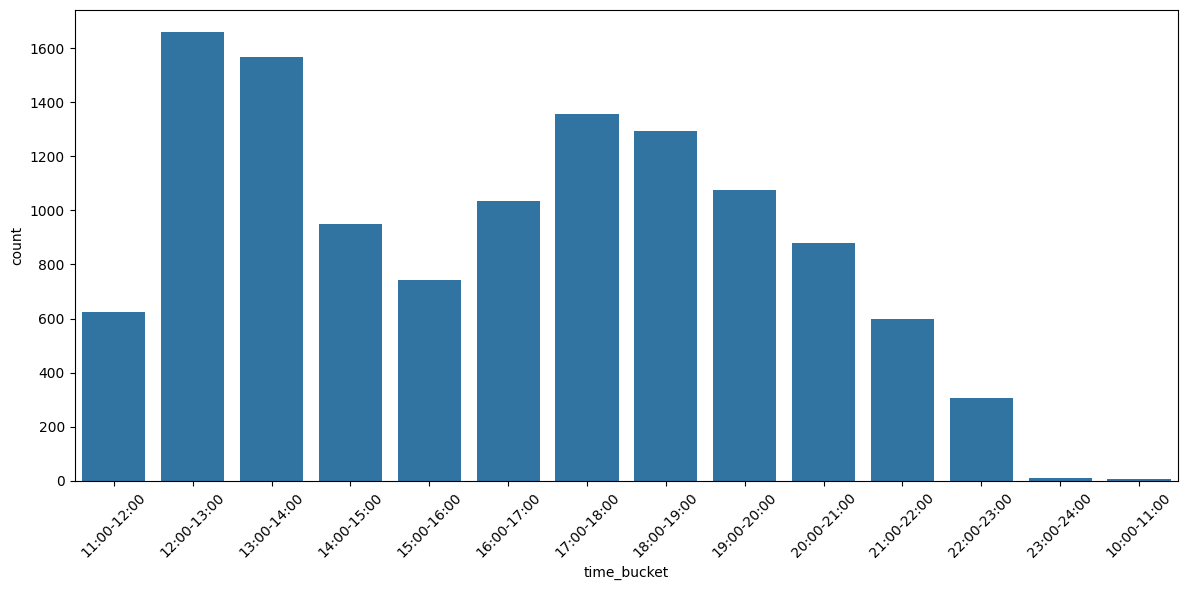

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='time_bucket')
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

In [27]:
merged_df['meal_bucket'] =merged_df['time_seconds'].apply(
    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else
              'Lunch' if 11 * 3600 <= x < 16 * 3600 else
              'Evening' if 16 * 3600 <= x < 20 * 3600 else
              'Night'
)
print(merged_df['meal_bucket'].value_counts())

meal_bucket
Lunch        5540
Evening      4754
Night        1798
Breakfast       5
Name: count, dtype: int64


In [28]:
merged_df[merged_df['meal_bucket']== 'Night']

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price,time_seconds,weekday,time_bucket,meal_bucket
142,143,60,2023-01-01,20:05:16,104.0,104.0,Veggie Burger,American,10.50,72316,Sunday,20:00-21:00,Night
143,144,60,2023-01-01,20:05:16,125.0,125.0,Spaghetti & Meatballs,Italian,17.95,72316,Sunday,20:00-21:00,Night
144,145,61,2023-01-01,20:08:43,101.0,101.0,Hamburger,American,12.95,72523,Sunday,20:00-21:00,Night
145,146,61,2023-01-01,20:08:43,117.0,117.0,Chicken Burrito,Mexican,12.95,72523,Sunday,20:00-21:00,Night
146,147,62,2023-01-01,20:50:16,101.0,101.0,Hamburger,American,12.95,75016,Sunday,20:00-21:00,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,12230,5369,2023-03-31,22:05:04,109.0,109.0,Korean Beef Bowl,Asian,17.95,79504,Friday,22:00-23:00,Night
12230,12231,5369,2023-03-31,22:05:04,129.0,129.0,Mushroom Ravioli,Italian,15.50,79504,Friday,22:00-23:00,Night
12231,12232,5369,2023-03-31,22:05:04,120.0,120.0,Steak Torta,Mexican,13.95,79504,Friday,22:00-23:00,Night
12232,12233,5369,2023-03-31,22:05:04,122.0,122.0,Chips & Salsa,Mexican,7.00,79504,Friday,22:00-23:00,Night


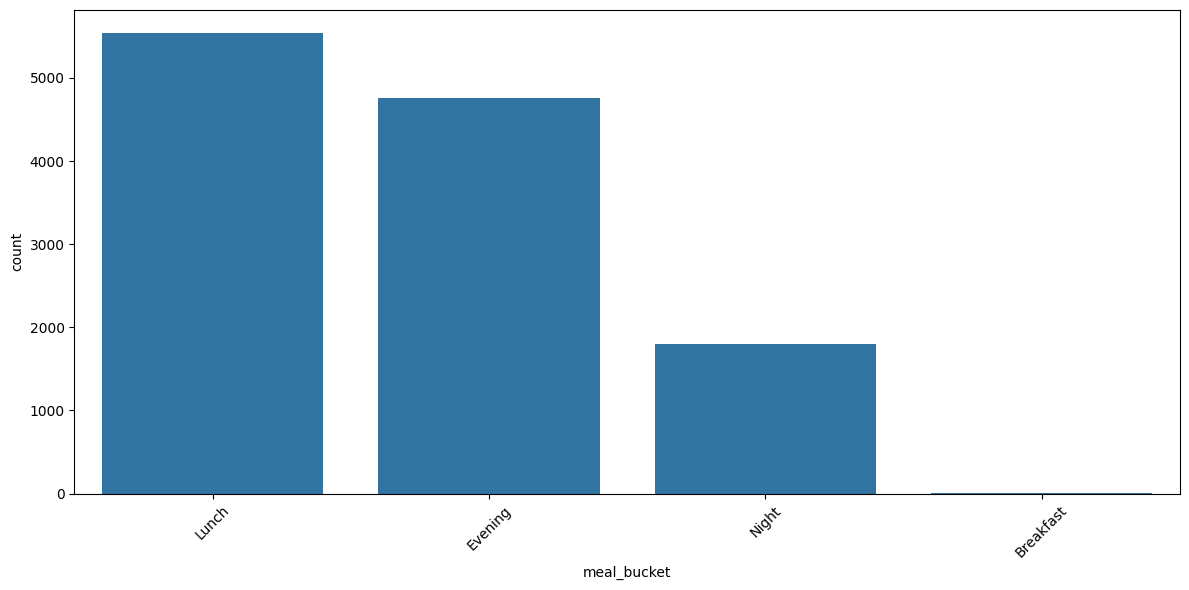

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='meal_bucket')
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

C:\Users\yania\AppData\Local\Temp\ipykernel_17896\966680588.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\yania\AppData\Local\Temp\ipykernel_17896\966680588.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\yania\AppData\Local\Temp\ipykernel_17896\966680588.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


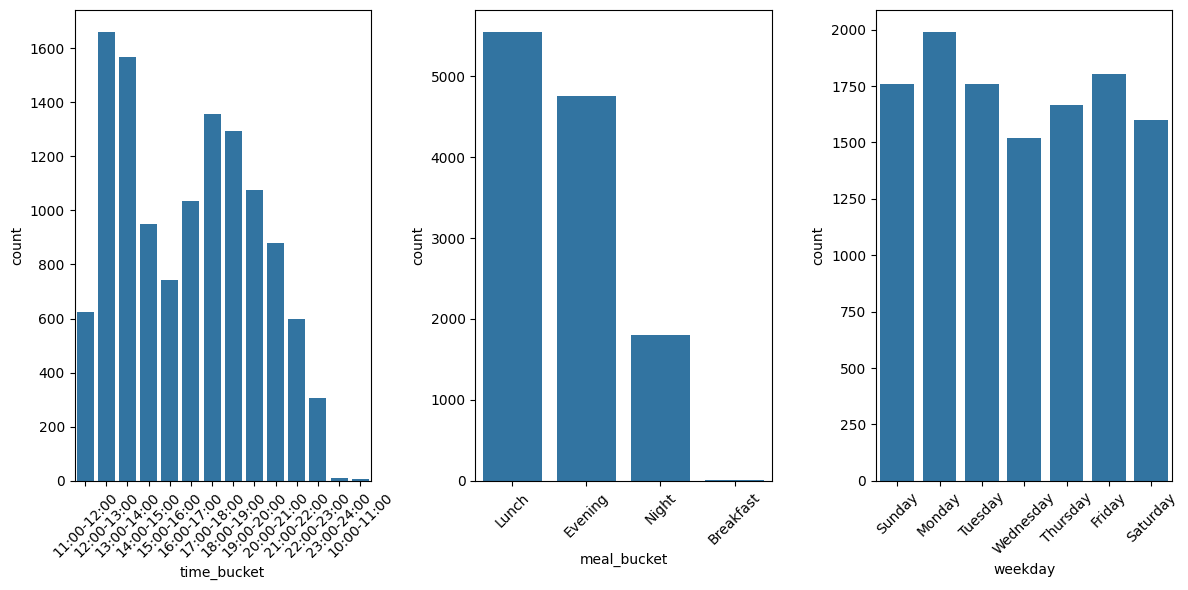

In [30]:
fig,axes = plt.subplots(1,3, figsize=(12,6))
sns.countplot(data=merged_df, x='time_bucket', ax=axes[0])
sns.countplot(data=merged_df, x='meal_bucket', ax=axes[1])
sns.countplot(data=merged_df, x='weekday', ax=axes[2])
# Rotate x-axis labels on each subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

In [128]:
order_counts = merged_df.groupby(['weekday', 'time_bucket']).agg(order_quantity=('order_id', 'count')).reset_index()
order_counts

,weekday,time_bucket,order_quantity
0,Friday,11:00-12:00,84
1,Friday,12:00-13:00,283
2,Friday,13:00-14:00,275
3,Friday,14:00-15:00,153
4,Friday,15:00-16:00,100
...,...,...,...
83,Wednesday,18:00-19:00,168
84,Wednesday,19:00-20:00,124
85,Wednesday,20:00-21:00,116
86,Wednesday,21:00-22:00,73


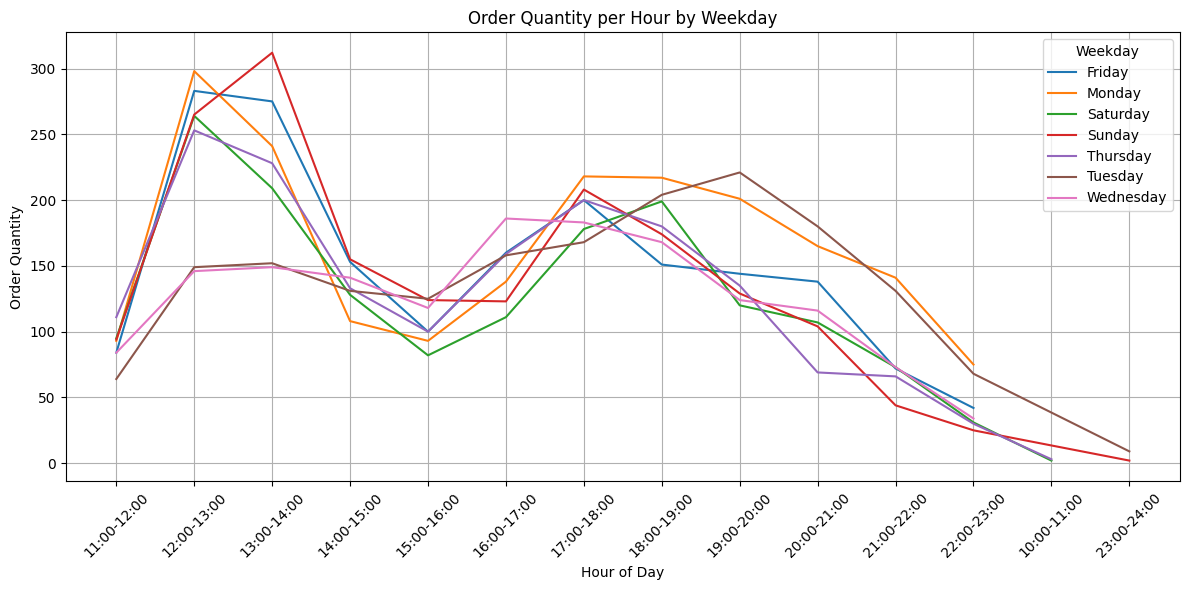

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_counts, x='time_bucket', y='order_quantity', hue='weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Order Quantity per Hour by Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Order Quantity")
plt.legend(title='Weekday')
plt.tight_layout()




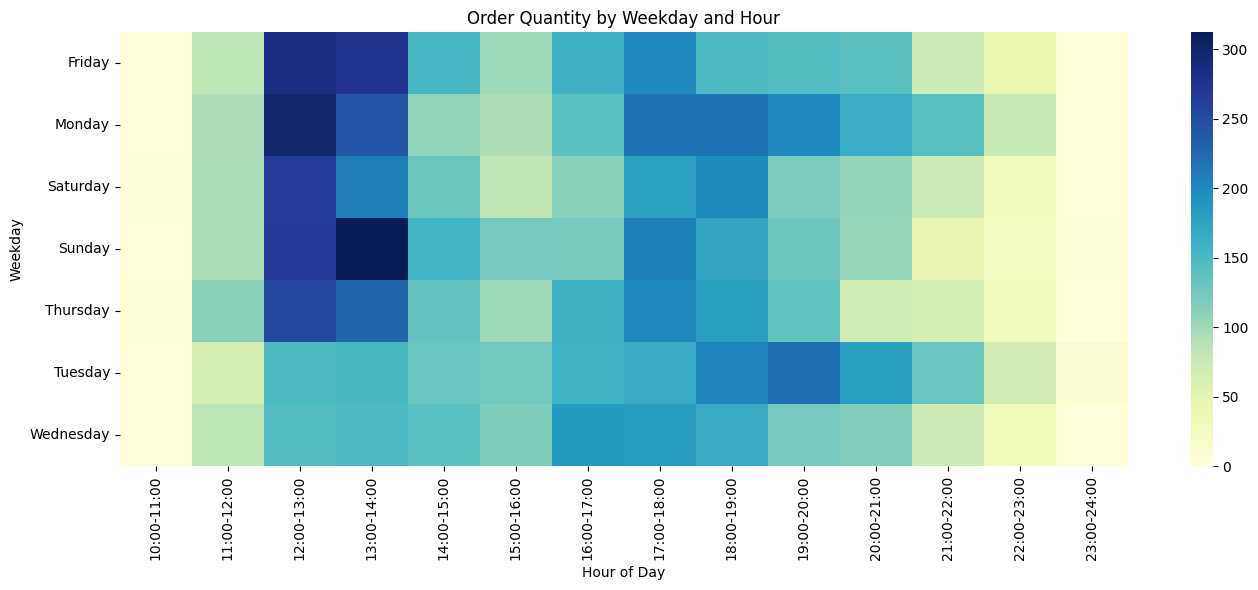

In [136]:
# Pivot the data for heatmap (rows=weekday, columns=hour)
heatmap_data = order_counts.pivot_table(
    index='weekday',
    columns='time_bucket',
    values='order_quantity',
    fill_value=0
)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Order Quantity by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

In [93]:
print(merged_df['category'].value_counts())

category
Asian       3470
Italian     2948
Mexican     2945
American    2734
Name: count, dtype: int64


In [144]:
item_counts = merged_df.groupby(['item_name']).agg(item_quantity=('item_name', 'count')).sort_values(by='item_quantity', ascending=False).reset_index()
item_counts

,item_name,item_quantity
0,Hamburger,622
1,Edamame,620
2,Korean Beef Bowl,588
3,Cheeseburger,583
4,French Fries,571
5,Tofu Pad Thai,562
6,Steak Torta,489
7,Spaghetti & Meatballs,470
8,Mac & Cheese,463
9,Chips & Salsa,461


C:\Users\yania\AppData\Local\Temp\ipykernel_17896\647777335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_counts, x='item_name', y='item_quantity', palette='viridis')
C:\Users\yania\AppData\Local\Temp\ipykernel_17896\647777335.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


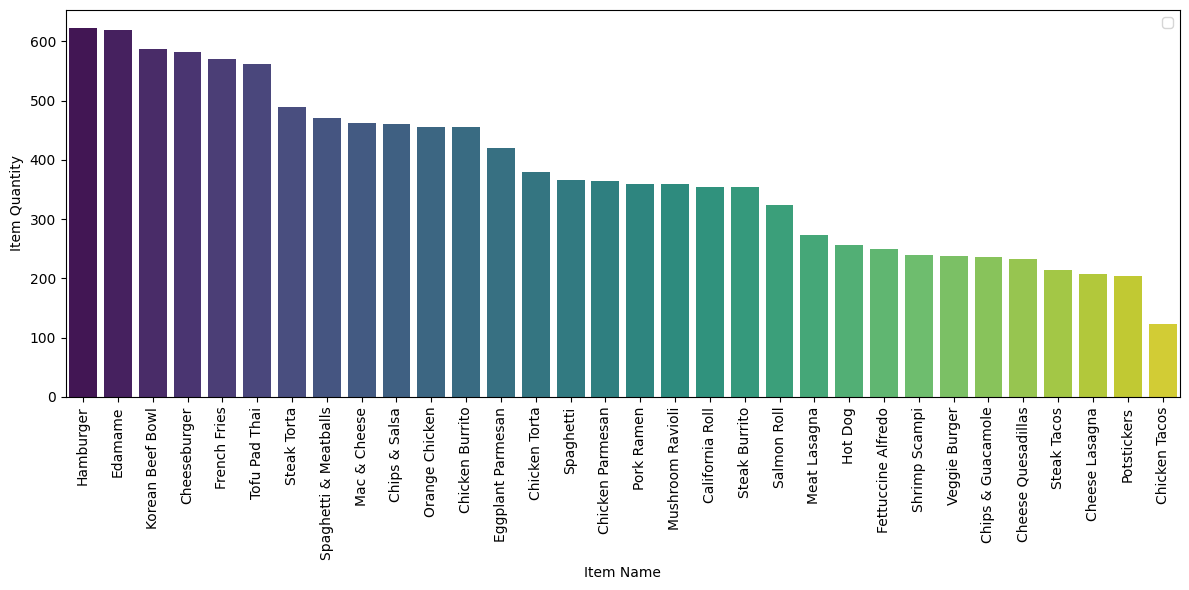

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot(data=item_counts, x='item_name', y='item_quantity', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
count_items = merged_df.groupby(['item_name', 'time_bucket']).agg(item_quantity=('item_name', 'count')).reset_index()
count_items

,item_name,time_bucket,item_quantity
0,California Roll,10:00-11:00,1
1,California Roll,11:00-12:00,16
2,California Roll,12:00-13:00,52
3,California Roll,13:00-14:00,59
4,California Roll,14:00-15:00,23
...,...,...,...
395,Veggie Burger,18:00-19:00,29
396,Veggie Burger,19:00-20:00,16
397,Veggie Burger,20:00-21:00,20
398,Veggie Burger,21:00-22:00,13


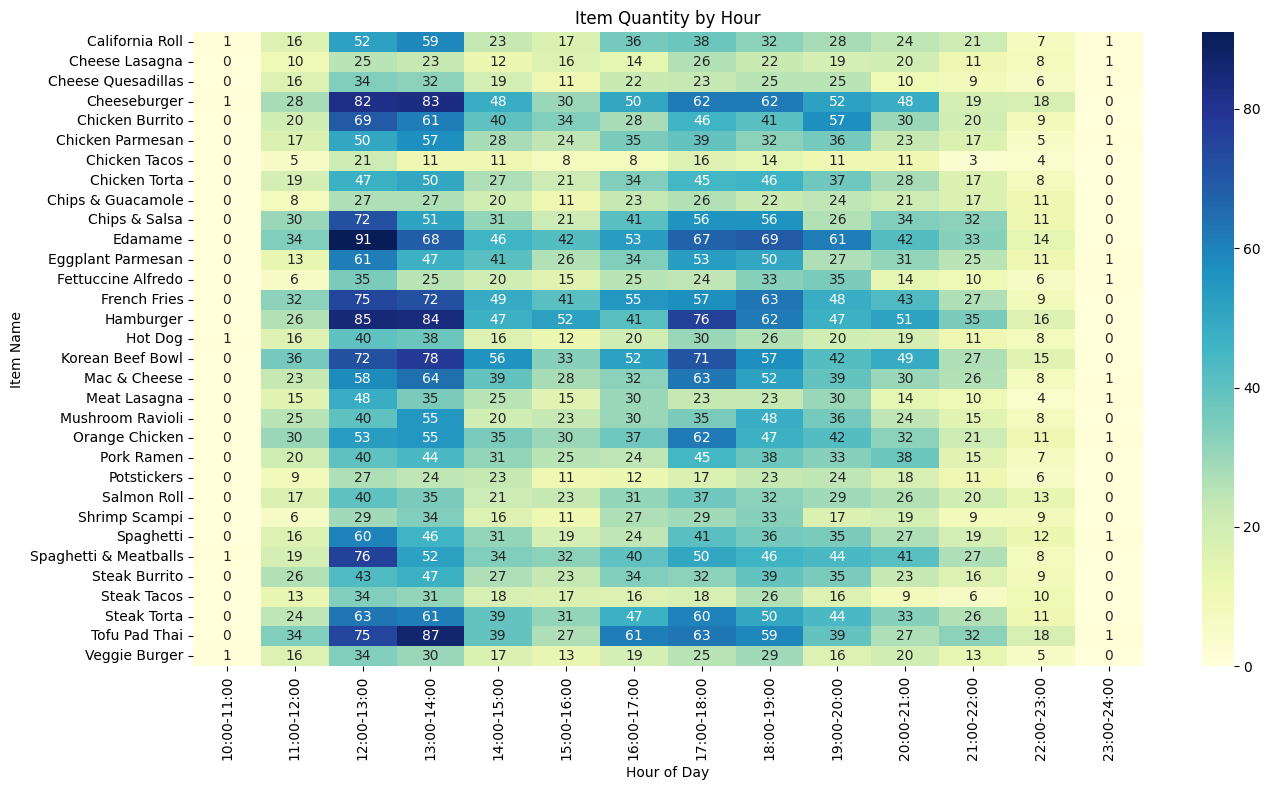

In [184]:
# Pivot the data for heatmap (rows=weekday, columns=hour)
heatmap_data = count_items.pivot_table(
    index='item_name',
    columns='time_bucket',
    values='item_quantity',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title("Item Quantity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()

In [158]:
merged_df.head(5)

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price,time_seconds,weekday,time_bucket,meal_bucket
0,1,1,2023-01-01,11:38:36,109.0,109.0,Korean Beef Bowl,Asian,17.95,41916,Sunday,11:00-12:00,Lunch
1,2,2,2023-01-01,11:57:40,108.0,108.0,Tofu Pad Thai,Asian,14.50,43060,Sunday,11:00-12:00,Lunch
2,3,2,2023-01-01,11:57:40,124.0,124.0,Spaghetti,Italian,14.50,43060,Sunday,11:00-12:00,Lunch
3,4,2,2023-01-01,11:57:40,117.0,117.0,Chicken Burrito,Mexican,12.95,43060,Sunday,11:00-12:00,Lunch
4,5,2,2023-01-01,11:57:40,129.0,129.0,Mushroom Ravioli,Italian,15.50,43060,Sunday,11:00-12:00,Lunch


In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Step 1: Aggregate the data to get order count per weekday and time_bucket
grouped_df = merged_df.groupby(['weekday', 'time_bucket']).size().reset_index(name='order_count')

# Step 2: Define features and target
X = grouped_df[['weekday', 'time_bucket']]
y = grouped_df['order_count']

# Step 3: Preprocessing
categorical_features = ['weekday', 'time_bucket']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 4: Build pipeline with model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb(random_state=42))
])

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


ImportError: cannot import name 'xgboost' from 'sklearn.ensemble' (C:\Users\yania\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\__init__.py)

In [169]:
sample_input = pd.DataFrame({
    'weekday': ['Tuesday'],
    'time_bucket': ['22:00–23:00']
})
prediction = model.predict(sample_input)
print(f"Predicted order count: {int(prediction[0])}")


Predicted order count: 156


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Step 1: Aggregate data to get count of orders and average price/category per weekday and time_bucket
agg_df = (
    merged_df
    .groupby(['weekday', 'time_bucket'])
    .agg(
        order_count=('order_id', 'count'),
        top_category=('category', lambda x: x.mode()[0])  # most common category
    )
    .reset_index()
)

# Step 2: Define features and target
X = agg_df[['weekday', 'time_bucket', 'top_category']]
y = agg_df['order_count']

# Step 3: Preprocessing
categorical_features = ['weekday', 'time_bucket', 'top_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 4: Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1512.01


In [187]:
sample_input = pd.DataFrame({
    'weekday': ['Monday'],
    'time_bucket': ['13:00–14:00'],
    'top_category': ['Asian']  # likely category
})
prediction = model.predict(sample_input)
print(f"Predicted order count: {int(prediction[0])}")


Predicted order count: 140


In [188]:
grouped_df = (
    merged_df
    .groupby(['weekday', 'time_bucket', 'item_name'])
    .size()
    .reset_index(name='order_count')
)


In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Features and target
X = grouped_df[['weekday', 'time_bucket', 'item_name']]
y = grouped_df['order_count']

# Categorical features
categorical_features = ['weekday', 'time_bucket', 'item_name']

# Preprocessing: One-hot encode categorical features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with Linear Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")


Linear Regression Mean Squared Error: 5.24


In [199]:
sample_input = pd.DataFrame({
    'weekday': ['Tuesday'],
    'time_bucket': ['11:00–12:00'],
    'item_name': ['Chicken Biryani']
})

prediction = model.predict(sample_input)
print(f"Predicted order count: {prediction[0]:.2f}")


Predicted order count: 4.28


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Step 1: Aggregate data to get count of orders and average price/category per weekday and time_bucket
agg_df = (
    merged_df
    .groupby(['weekday', 'time_bucket'])
    .agg(
        order_count=('order_id', 'count'),
        top_item=('item_name', lambda x: x.mode()[0])  # most common category
    )
    .reset_index()
)

# Step 2: Define features and target
X = agg_df[['weekday', 'time_bucket', 'top_item']]
y = agg_df['order_count']

# Step 3: Preprocessing
categorical_features = ['weekday', 'time_bucket', 'top_item']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 4: Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1927.86


In [206]:
sample_input = pd.DataFrame({
    'weekday': ['Sunday'],
    'time_bucket': ['12:00–13:00'],
    'top_item': ['Chicken Biryani']
})

prediction = model.predict(sample_input)
print(f"Predicted order count: {prediction[0]:.2f}")


Predicted order count: 125.28


TypeError: unhashable type: 'numpy.ndarray'

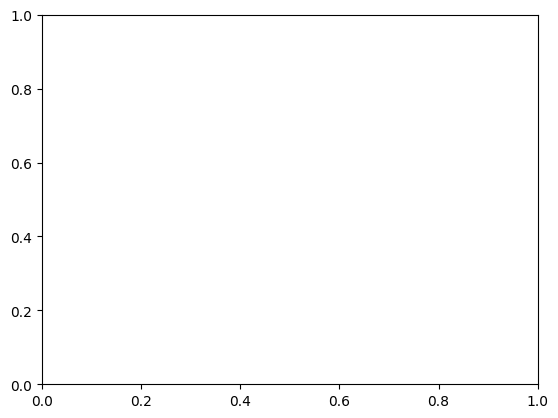

In [207]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('weekdays')
plt.ylabel('order_time')
plt.show()